In [9]:
import pandas as pd

In [10]:
#demographic data

demo = pd.read_csv('./data/processed/demographics.csv')

# demographics = pd.read_csv("./data/raw/prolific_demographics.csv")
# demo2= pd.read_csv("./data/raw/prolific_demo_2.csv")
# demo3= pd.read_csv("./data/raw/prolific_demo_3.csv")


# demo = demographics.append(demo2, ignore_index=True)
# demo = demo.append(demo3, ignore_index=True)

# demo.count()
# demo.to_csv("./data/processed/demographics.csv")

In [48]:
Sdf = pd.read_csv('./data/raw/Scenario_1016.csv')
Udf = pd.read_csv('./data/raw/User_1016.csv')
## This subsection removed incomplete or invalid participants
## There are 398 valid users in total
Udf = Udf[Udf['finished']==1] #remove unfinished ones
Udf = Udf.loc[Udf['UID'].str.len() == 24]  #remove non prolific user
Udf=Udf.dropna()

Udf = pd.merge(Udf, demo, how='inner', left_on='UID', right_on='Participant id')

user_set = set(Udf['UID']) #remove duplicates #missing 60ddf017992f20e34420dd08, 63225b7b6cc60206778d70fe
# demo_set = set(demo['Participant id'])
print(len(user_set))
# print(len(demo_set))
# print(demo_set.difference(user_set))


# # Udf.to_csv('./data/processed/user.csv')

# df.to_csv('./data/processed/scenario_example.csv')
# print(len(df))

## This subsection removed incomplete or invalid trials based on Users dataframe
## There are 3980 valid trials in total
#df = pd.merge(Udf, Sdf, how='inner', left_on='UID', right_on='prolificId')
df = Sdf[Sdf['UID'].isin(user_set)]
df = df.drop('searchKeyword', axis=1)
df = df.drop('gifList', axis=1)
print(df.count())
freq = df['UID'].value_counts()
print(freq[freq != 10])
df.to_csv('./data/processed/scenario.csv')


398
id             3980
UID            3980
scenarioIDX    3980
STime          3788
ETime          3980
text           3970
gif            3980
Q1             3980
Q3             3980
Q4             3980
Q5             3980
Q6             3980
dtype: int64
Series([], Name: UID, dtype: int64)


In [50]:
Sdf['Q1'].count

<bound method Series.count of 0       0.0
1       NaN
2       1.0
3       1.0
4       1.0
       ... 
4202    1.0
4203    1.0
4204    1.0
4205    0.0
4206    0.0
Name: Q1, Length: 4207, dtype: float64>

In [4]:

column_names = ["UID", "Q1", "Q3", "Q4","Q5", "Q6", "trial_count"]
df = pd.DataFrame(columns = column_names)

# for participantID in user_set:
participantID="5f4fdba442d1a7110ae00343"

for participantID in user_set:
    df = df.append({"UID":participantID, 
               "Q1": Sdf[Sdf["prolificId"] == participantID].mean().values[4], 
               "Q3": Sdf[Sdf["prolificId"] == participantID].mean().values[5], 
               "Q4": Sdf[Sdf["prolificId"] == participantID].mean().values[6], 
               "Q5": Sdf[Sdf["prolificId"] == participantID].mean().values[7], 
               "Q6": Sdf[Sdf["prolificId"] == participantID].mean().values[8], 
               "trial_count":Sdf[Sdf["prolificId"] == participantID].count().values[0]
              },ignore_index=True)
#df = df.dropna()

ndf = pd.merge(df, demo, how='inner', left_on='UID', right_on='Participant id')
ndf.count()


/var/folders/k5/cr7j5c4x0hxgb876c543f9qr0000gn/T/ipykernel_1804/1367461955.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  "Q1": Sdf[Sdf["prolificId"] == participantID].mean().values[4],
/var/folders/k5/cr7j5c4x0hxgb876c543f9qr0000gn/T/ipykernel_1804/1367461955.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  "Q3": Sdf[Sdf["prolificId"] == participantID].mean().values[5],
/var/folders/k5/cr7j5c4x0hxgb876c543f9qr0000gn/T/ipykernel_1804/1367461955.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before call

UID                     398
Q1                      396
Q3                      398
Q4                      398
Q5                      398
Q6                      398
trial_count             398
Unnamed: 0              398
Submission id           398
Participant id          398
Status                  398
Started at              398
Completed at            398
Reviewed at             397
Archived at             398
Time taken              398
Completion code         398
Total approvals         398
Total rejections        398
Approval rate           398
Ethnicity               398
Tweeting frequency      398
Age                     398
Sex                     398
Ethnicity simplified    398
Country of birth        398
Country of residence    398
Nationality             398
Language                398
Student status          398
Employment status       398
dtype: int64

In [32]:
ndf.tail()

,UID,Q1,Q3,Q4,Q5,Q6,trial_count,Unnamed: 0,Submission id,Participant id,...,Tweeting frequency,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
393,631a7ce2d4205cc3662da901,0.5,0.1,0.2,1.4,1.3,10,118,631b5faba0c7a36308a217e2,631a7ce2d4205cc3662da901,...,4-20 times,29,Male,Black,United States,United States,United States,English,No,Unemployed (and job seeking)
394,5ef29b0e8797c310fc81fa4e,0.9,0.5,0.4,1.7,1.9,10,152,632df883a16c93a57f45a108,5ef29b0e8797c310fc81fa4e,...,20-100 times,29,Female,Black,United States,United States,United States,English,Yes,Part-Time
395,5eb3629472398915cb013c43,0.5,0.3,0.5,1.8,2.0,10,199,63026f942e6d92d6d4d6c172,5eb3629472398915cb013c43,...,more than 100 times,35,Female,Black,United States,United States,United States,English,No,Due to start a new job within the next month
396,611af405085b2a25ec6e1eae,0.1,0.0,0.0,2.3,2.5,10,204,63039323529ac4b118e4e080,611af405085b2a25ec6e1eae,...,20-100 times,48,Female,White,United States,United States,United States,English,No,Full-Time
397,56db4c217dcddf000bd5853c,0.0,0.2,0.4,1.4,1.4,10,326,6303a22b0eb2eb610fe60324,56db4c217dcddf000bd5853c,...,more than 100 times,63,Female,White,United States,United States,United States,English,No,Part-Time


<AxesSubplot:title={'center':'Q6'}, xlabel='[Ethnicity, Sex]'>

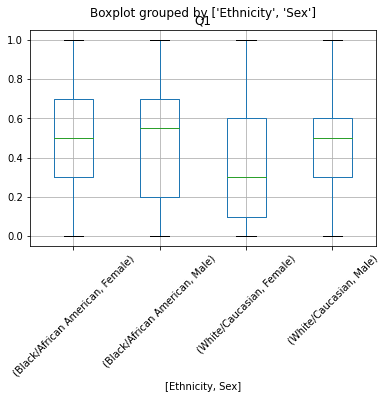

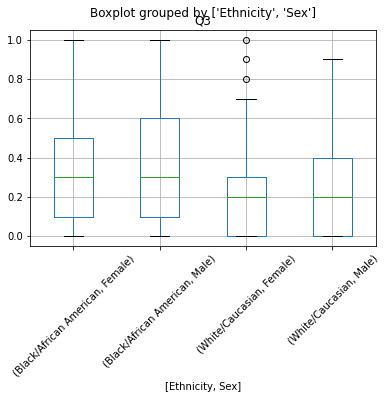

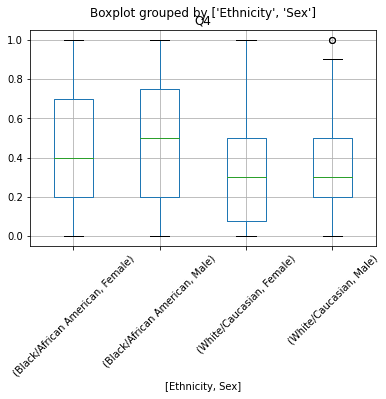

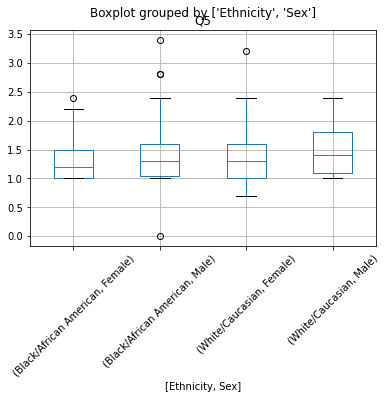

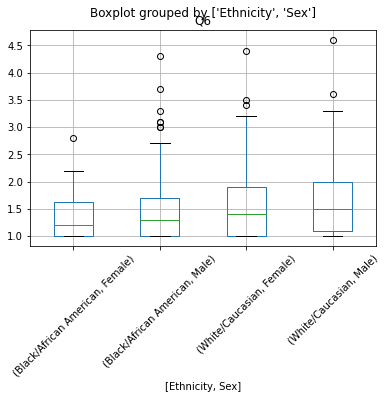

In [31]:

ndf.boxplot(column='Q1', by=['Ethnicity', 'Sex'],rot=45)
ndf.boxplot(column='Q3', by=['Ethnicity', 'Sex'],rot=45)
ndf.boxplot(column='Q4', by=['Ethnicity', 'Sex'],rot=45)
ndf.boxplot(column='Q5', by=['Ethnicity', 'Sex'],rot=45)
ndf.boxplot(column='Q6', by=['Ethnicity', 'Sex'],rot=45)

In [8]:
from scipy.stats import mannwhitneyu

In [13]:
Udf.head()

,id,UID,STime,ETime,Q1,Q2,Q3,Q4,Q5,Q6,...,Tweeting frequency,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,15,62d9782b0a0018523c64bb1c,2022-08-21 14:21:41.86,2022-08-21 14:41:04.344,10,40,50,3,3,4,...,4-20 times,43,Male,Black,United States,United States,United States,English,No,"Not in paid work (e.g. homemaker', 'retired or..."
1,16,60fcad4f2eb7b86a07b5e4c7,2022-08-21 14:22:57.584,2022-08-21 14:42:09.903,70,80,80,2,2,2,...,20-100 times,22,Male,Black,United States,United States,United States,English,Yes,Full-Time
2,23,5ff94e71c59814230b0fb713,2022-08-21 14:49:38.84,2022-08-21 15:00:54.127,50,10,5,3,3,3,...,more than 100 times,30,Male,Black,United States,United States,United States,English,Yes,DATA_EXPIRED
3,19,62bc3401dc67c7598dbba4a6,2022-08-21 14:34:40.337,2022-08-21 15:08:16.879,60,70,70,5,4,5,...,more than 100 times,29,Male,Black,United States,United States,United States,English,No,Full-Time
4,25,5d75c56a52c89d0017df611c,2022-08-21 14:57:30.573,2022-08-21 15:23:41.117,80,60,40,3,3,3,...,20-100 times,40,Female,Black,United States,United States,United States,English,DATA_EXPIRED,DATA_EXPIRED


<AxesSubplot:title={'center':'Q6'}, xlabel='[Ethnicity, Sex]'>

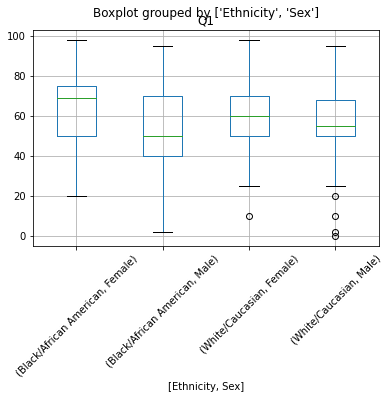

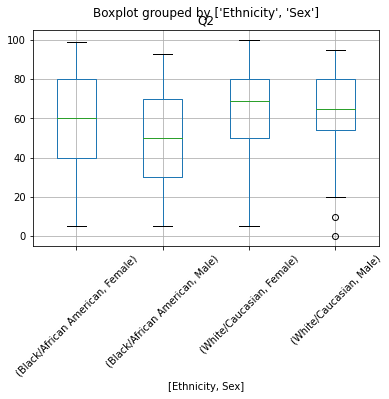

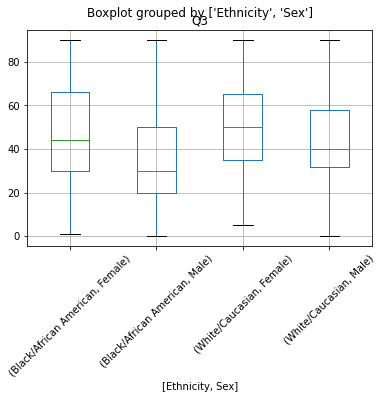

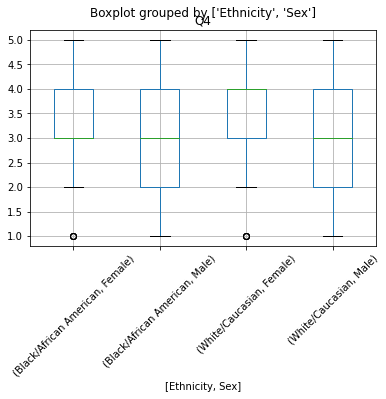

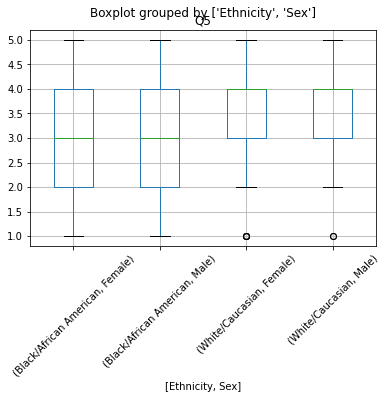

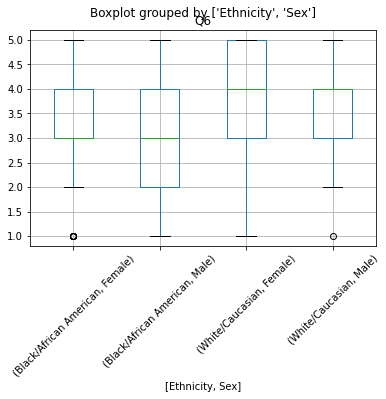

In [12]:
Udf.boxplot(column='Q1', by=['Ethnicity', 'Sex'],rot=45)
Udf.boxplot(column='Q2', by=['Ethnicity', 'Sex'],rot=45)
Udf.boxplot(column='Q3', by=['Ethnicity', 'Sex'],rot=45)
Udf.boxplot(column='Q4', by=['Ethnicity', 'Sex'],rot=45)
Udf.boxplot(column='Q5', by=['Ethnicity', 'Sex'],rot=45)
Udf.boxplot(column='Q6', by=['Ethnicity', 'Sex'],rot=45)



In [6]:
Udf.groupby(['Ethnicity', 'Sex']).size()
Udf.value_counts(subset=['Ethnicity', 'Sex']) 
# Udf[Udf["Ethnicity" == "Black/African American"]]['Q4'].value_counts()

# print(Udf.loc[(Udf['Ethnicity'] == "Black/African American") & (Udf['Sex'] == "Male")]['Q4'].value_counts())
# print(Udf.loc[(Udf['Ethnicity'] == "Black/African American") & (Udf['Sex'] == "Female")]['Q4'].value_counts())
# print(Udf.loc[(Udf['Ethnicity'] == "White/Caucasian") & (Udf['Sex'] == "Male")]['Q4'].value_counts())
# print(Udf.loc[(Udf['Ethnicity'] == "White/Caucasian") & (Udf['Sex'] == "Female")]['Q4'].value_counts())

# five =  [18,21,13,23]
# four =  [19,28,29,36]
# three = [34,31,29,29]
# two = [20, 16, 25,8]
# one = [8, 4, 3, 4]
from cProfile import label
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(index=[Udf.Ethnicity, Udf.Sex],
                        columns=Udf['Q4'])
cross_tab

# cross_tab.plot(kind='barh', 
#                     stacked=True, 
#                     color=["#26ad53", "#8fb89d", "#c9c9c9", "#fcbbbb", "#ff7575"], 
#                     figsize=(10, 6))
# plt.legend(loc="upper left", ncol=5, labels=["Strongly Agree", "Somewhat Agree", "Neutral", "Somewhat Disagree", "Strongly Disagree"])
# plt.xlabel("Value Count")
# plt.ylabel("Participant Identity")
# plt.title("I choose the animated gif with characters of the same gender identity as mine.")
# plt.show()

Q4                             1   2   3   4   5
Ethnicity              Sex                      
Black/African American Female  4  16  31  28  21
                       Male    8  20  34  19  18
White/Caucasian        Female  4   8  29  36  23
                       Male    3  25  29  29  13

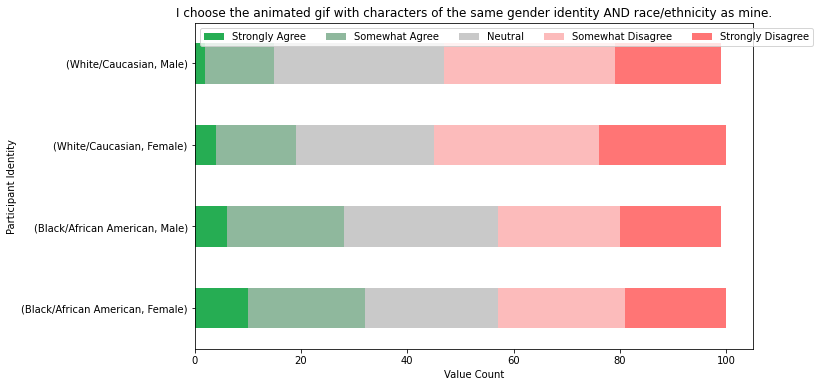

In [8]:
# When I choose an animated gif in twitter, 
# I choose the animated gif with characters of the same race/ethnicity as mine.

cross_tab = pd.crosstab(index=[Udf.Ethnicity, Udf.Sex],
                        columns=Udf['Q5'])
cross_tab

cross_tab.plot(kind='barh', 
                    stacked=True, 
                    color=["#26ad53", "#8fb89d", "#c9c9c9", "#fcbbbb", "#ff7575"], 
                    figsize=(10, 6))
plt.legend(loc="upper left", ncol=5, labels=["Strongly Agree", "Somewhat Agree", "Neutral", "Somewhat Disagree", "Strongly Disagree"])
plt.xlabel("Value Count")
plt.ylabel("Participant Identity")
plt.title("I choose the animated gif with characters of the same race/ethnicity as mine.")
plt.show()

In [10]:

cross_tab = pd.crosstab(index=[Udf.Ethnicity, Udf.Sex],
                        columns=Udf['Q6'])
cross_tab

# cross_tab.plot(kind='barh', 
#                     stacked=True, 
#                     color=["#26ad53", "#8fb89d", "#c9c9c9", "#fcbbbb", "#ff7575"], 
#                     figsize=(10, 6))
# plt.legend(loc="upper left", ncol=5, labels=["Strongly Agree", "Somewhat Agree", "Neutral", "Somewhat Disagree", "Strongly Disagree"])
# plt.xlabel("Value Count")
# plt.ylabel("Participant Identity")
# plt.title("I choose the animated gif with characters of the same race/ethnicity as mine.")
# plt.show()

Q6                             1   2   3   4   5
Ethnicity              Sex                      
Black/African American Female  6  15  35  24  20
                       Male    4  22  28  26  19
White/Caucasian        Female  2   9  26  34  29
                       Male    1  15  31  28  24

In [11]:
Sdf = pd.read_csv('./data/raw/Scenario_1016.csv')
Sdf = pd.merge(Sdf, demo, how='inner', left_on='prolificId', right_on='Participant id')

cross_tab = pd.crosstab(index=[Sdf.Ethnicity, Sdf.Sex],
                         columns=Sdf['Q5'])
cross_tab


# cross_tab.plot(kind='barh', 
#                     stacked=True, 
#                     color=["#26ad53", "#8fb89d", "#c9c9c9", "#fcbbbb", "#ff7575"], 
#                     figsize=(10, 6))
# plt.legend(loc="upper left", ncol=5, labels=["Strongly Agree", "Somewhat Agree", "Neutral", "Somewhat Disagree", "Strongly Disagree"])
# plt.xlabel("Value Count")
# plt.ylabel("Participant Identity")
# plt.title(" This gif closely represents or describes the emotion I want to express.")
# plt.show()


Q5                             1.0  2.0  3.0  4.0  5.0
Ethnicity              Sex                            
Black/African American Female  744  220   27    9    0
                       Male    690  237   45   16    8
White/Caucasian        Female  668  291   24   13    4
                       Male    579  370   38    8    1

In [12]:
Sdf = pd.read_csv('./data/raw/Scenario_1016.csv')
Sdf = pd.merge(Sdf, demo, how='inner', left_on='prolificId', right_on='Participant id')

cross_tab = pd.crosstab(index=[Sdf.Ethnicity, Sdf.Sex],
                         columns=Sdf['Q6'])
cross_tab

# cross_tab.plot(kind='barh', 
#                     stacked=True, 
#                     color=["#26ad53", "#8fb89d", "#c9c9c9", "#fcbbbb", "#ff7575"], 
#                     figsize=(10, 6))
# plt.legend(loc="upper left", ncol=5, labels=["Strongly Agree", "Somewhat Agree", "Neutral", "Somewhat Disagree", "Strongly Disagree"])
# plt.xlabel("Value Count")
# plt.ylabel("Participant Identity")
# plt.title("I would use the selected gif in my own tweets.")
# plt.show()

Q6                             1.0  2.0  3.0  4.0  5.0
Ethnicity              Sex                            
Black/African American Female  735  187   48   27    3
                       Male    683  188   70   25   30
White/Caucasian        Female  623  249   60   42   26
                       Male    551  342   52   33   18